# Differential Equations

## Important libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Read and use LaTeX command
plt.rc('text', usetex=True)

#font's type
plt.rc('font', family='serif')

#enable the inline backend for usage with the IPython Notebook
%matplotlib inline

### Style Sheets from Matplotlib

[_here_](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html)

```Python
plt.style.use('ggplot') #a style to use in everyplot

with plt.style.context('ggplot'): #to use in a specific plot
    plt.plot(...
```

## Direction Field + Solution

**Differential Equation:**

$$x^{2}\frac{dy}{dx} - 2xy = 3y^{4}$$

**Solution:**

$$y^{-3} = -\frac{9}{5}x^{-1} + \frac{49}{5}x^{-6}$$
**or**
$$y(x) = \frac{1}{\sqrt[3]{\dfrac{9.8-\dfrac{9x^{5}}{5}}{x^{6}}}}$$


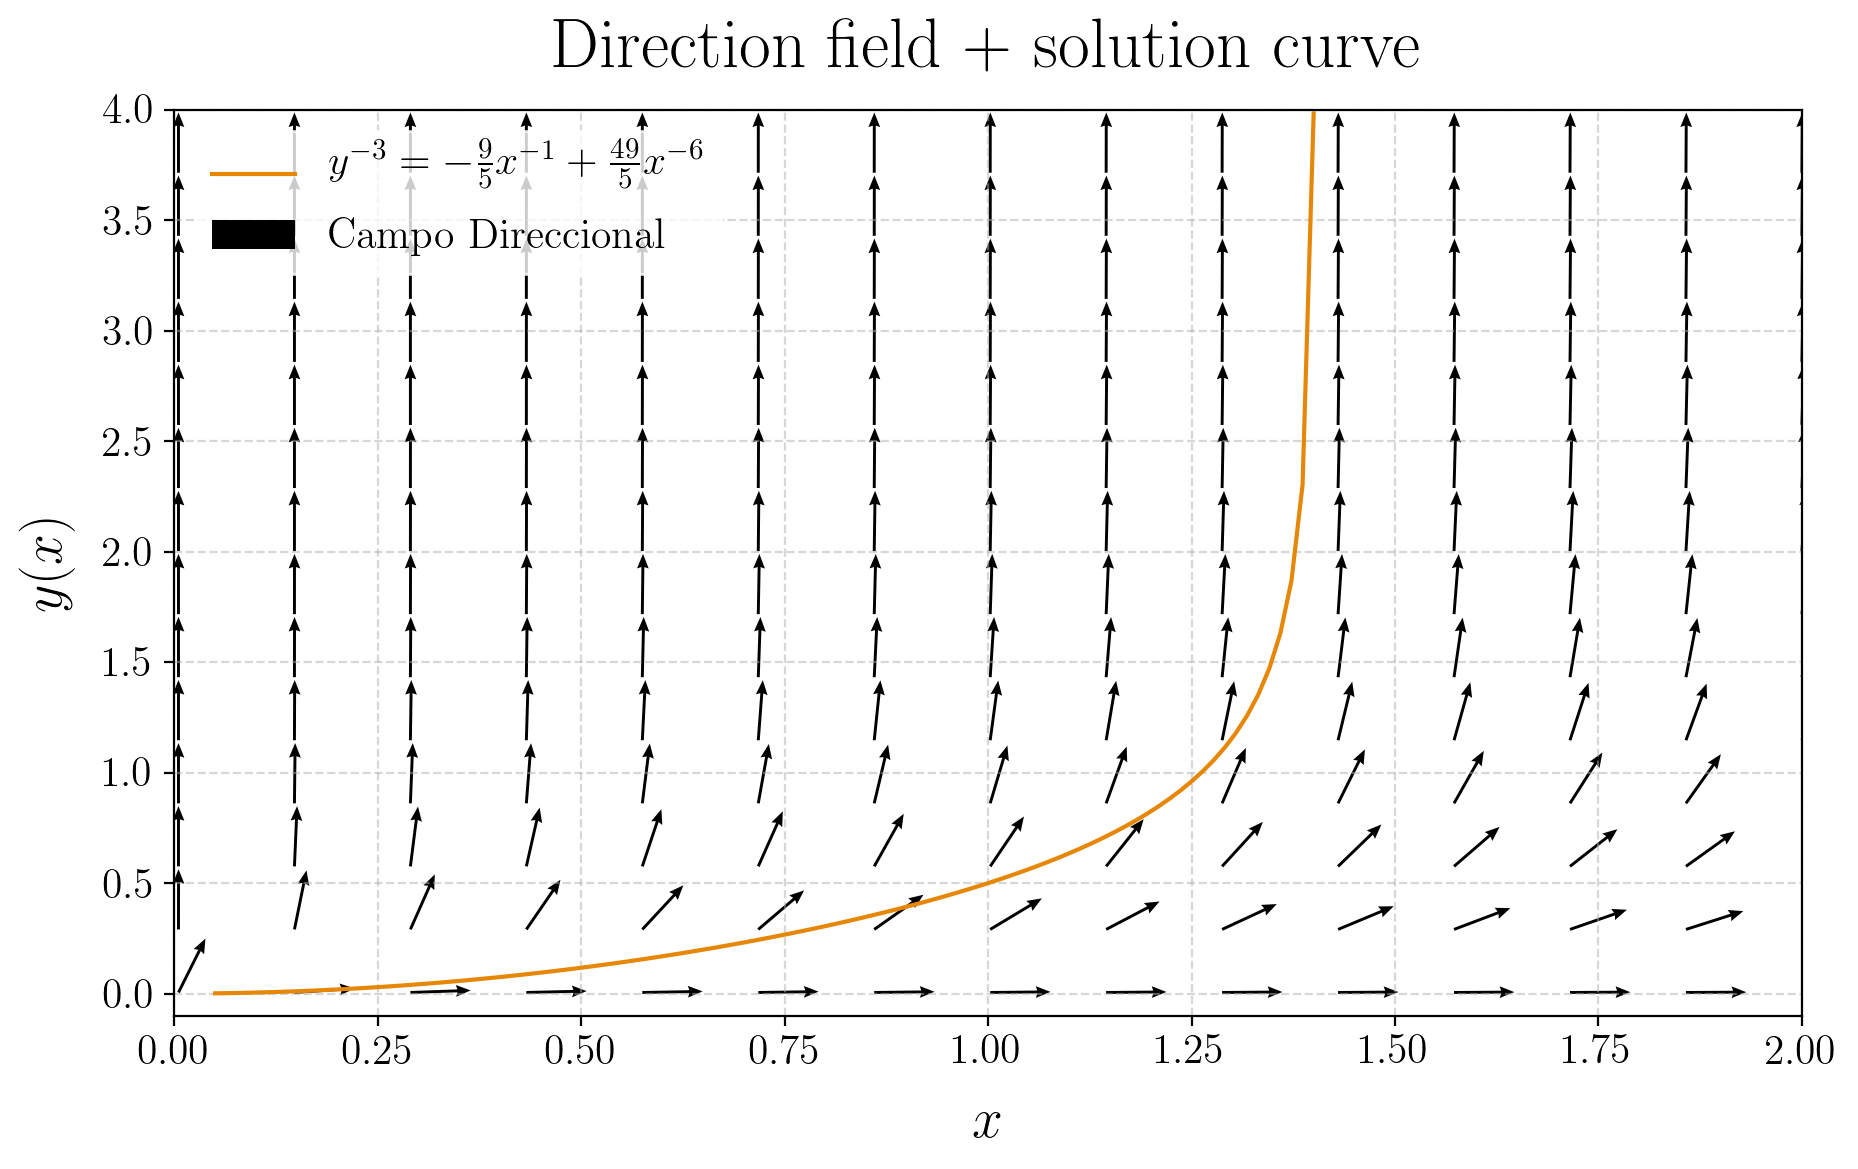

In [2]:
# ---------------------- DIRECTION FIELD -------------------------
#domain points for the vector field (direction field)
X_dirField = np.linspace( 0.005, 2, 15 )
Y_dirField = np.linspace( 0.005, 4, 15 )

#position in the 2D plane
X_dirField, Y_dirField = np.meshgrid(X_dirField, Y_dirField )

#direction of our vectors
U = 1
V = ( 3*(Y_dirField)**4 + 2*X_dirField*Y_dirField )/( X_dirField**2 )

#magnitude
MagVec = np.sqrt( U**2 + V**2 )

#normalize them
U = U/MagVec
V = V/MagVec

#--------------- SOLUTION CURVE -----------------------------------
def sol(X):
    return 1/( ( (9.8 - 1.8*(X**5))/(X**6) )**(1/3) )

#solution points
X_sol = np.linspace(0.05, 1.4, 100)
#------------------ PLOT TIME -------------------------------

plt.figure( figsize= ( 10.5, 6 ), 
           dpi = 200, #make your plot an HDPlot
          )

#solution curve
plt.plot( X_sol, sol(X_sol),
         color = '#E78708',
         label = r'$y^{-3} = -\frac{9}{5} x^{-1} + \frac{49}{5}x^{-6}$' )

#direction field
plt.quiver( X_dirField, Y_dirField, 
           U, V,
           width = 0.0018, #grosor de flechas
           headwidth = 4, #grosor de la cabeza
           headlength = 5, #finura/largo de la cabeza,
           label = 'Campo Direccional')

#Add title and label to the axes
plt.title( 'Direction field  $+$ solution curve', size = 25, pad = 15 )
plt.xlabel( '$x$', size = 20, labelpad = 10 )
plt.ylabel( '$y(x)$', size = 20, labelpad = 10 )
plt.xlim(0,2)
plt.ylim(-0.1,4)


#add legend
legend = plt.legend( loc = 0, prop = {'size':15} )
legend.get_frame().set_color('#FFFFFF')

#increase the size of the ticks
plt.tick_params( labelsize = 15 )

plt.grid( b = True, alpha = 0.5, linestyle = 'dashed' )


## Family of Curves

**Differential Equation**
$$x\frac{dx}{dy} = \sqrt{x^{2} + y^{2}}+y$$

**General Solution**
$$y(x) = x\sin\big( \ln(x) + C_{1} \big)$$

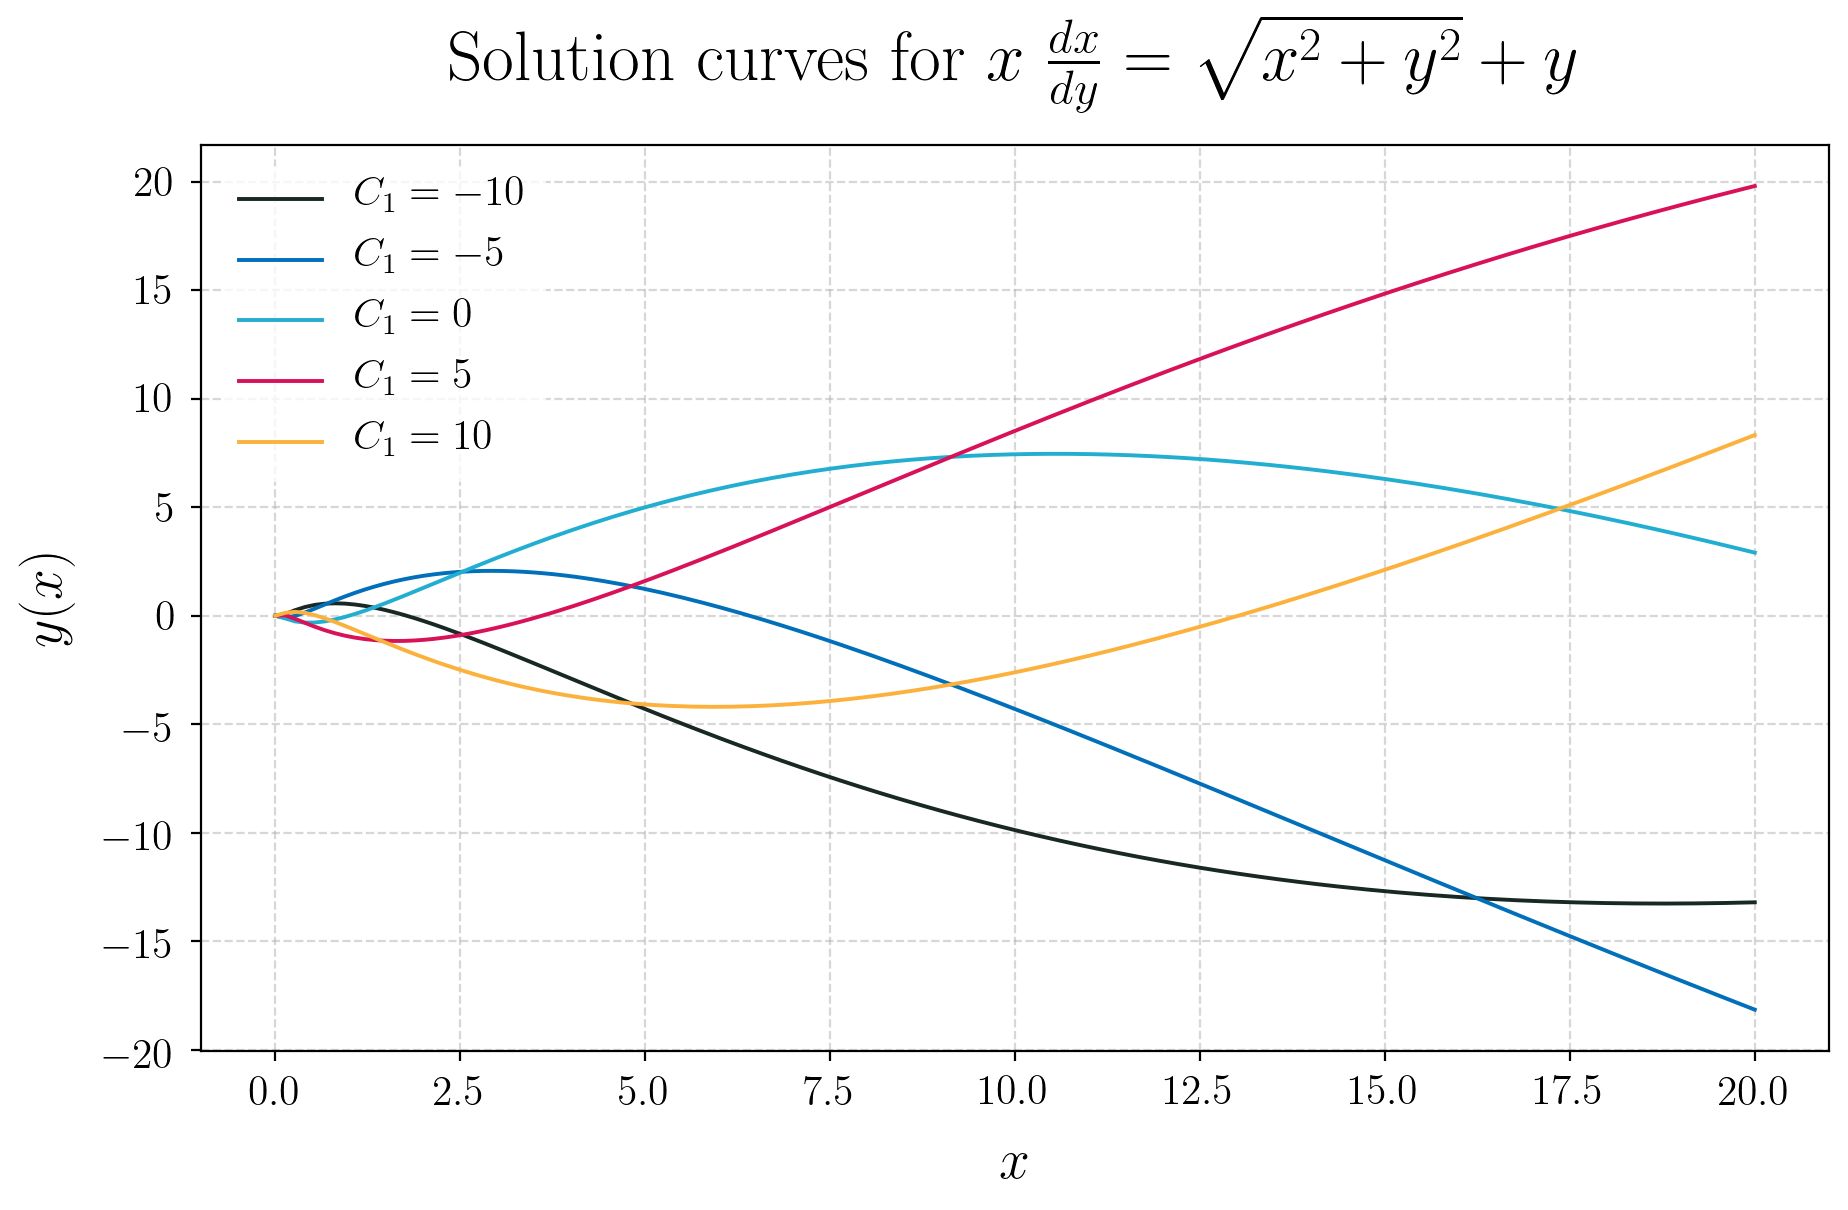

In [3]:
#define our solution
def sol(x,c):
    return x*np.sin( c + np.log(x) )

#define the domaing 
X = np.linspace( 0.001, 20, 150)

#c1 values
c1 = [-10,-5,0,5,10]
colorplot = ['#182825','#016FB9','#22AED1','#D81159','#FBB13C']


#label our curves
names = [r"$C_{1} = -10$", r"$C_{1} = -5$", r"$C_{1} = 0$", r"$C_{1} = 5$", r"$C_{1} = 10$"]

#use and specific style sheet for this plot 
with plt.style.context('seaborn-paper'):
    #create a figure
    plt.figure( figsize = (10.5,6),
               dpi = 200,
              )
    #use a for loop to plot all the curves
    for i in range(len(c1)):
        plt.plot( X, sol(X, c1[i]),
                 color = colorplot[i],
                 label = names[i]
                )
    
    #Add title and label to the axes
    plt.title( r'Solution curves for $x \ \frac{dx}{dy} = \sqrt{x^{2} + y^{2}}+y$', 
              size = 25, pad = 15 )
    plt.xlabel( '$x$', size = 20, labelpad = 10 )
    plt.ylabel( '$y(x)$', size = 20, labelpad = 10 )

    #add legend
    legend = plt.legend( loc = 0, prop = {'size':15} )
    legend.get_frame().set_color('#FFFFFF')

    #increase the size of the ticks
    plt.tick_params( labelsize = 15 )

    plt.grid( b = True, alpha = 0.5, linestyle = 'dashed' )

## Orthogonal trajectories

**Family of curves**
$$y^{2}-x^{2} = c$$

**Orthogonal trajectories**
$$y(x) = kx^{-1}$$

**where $k$ and $c$ are integer parameters**

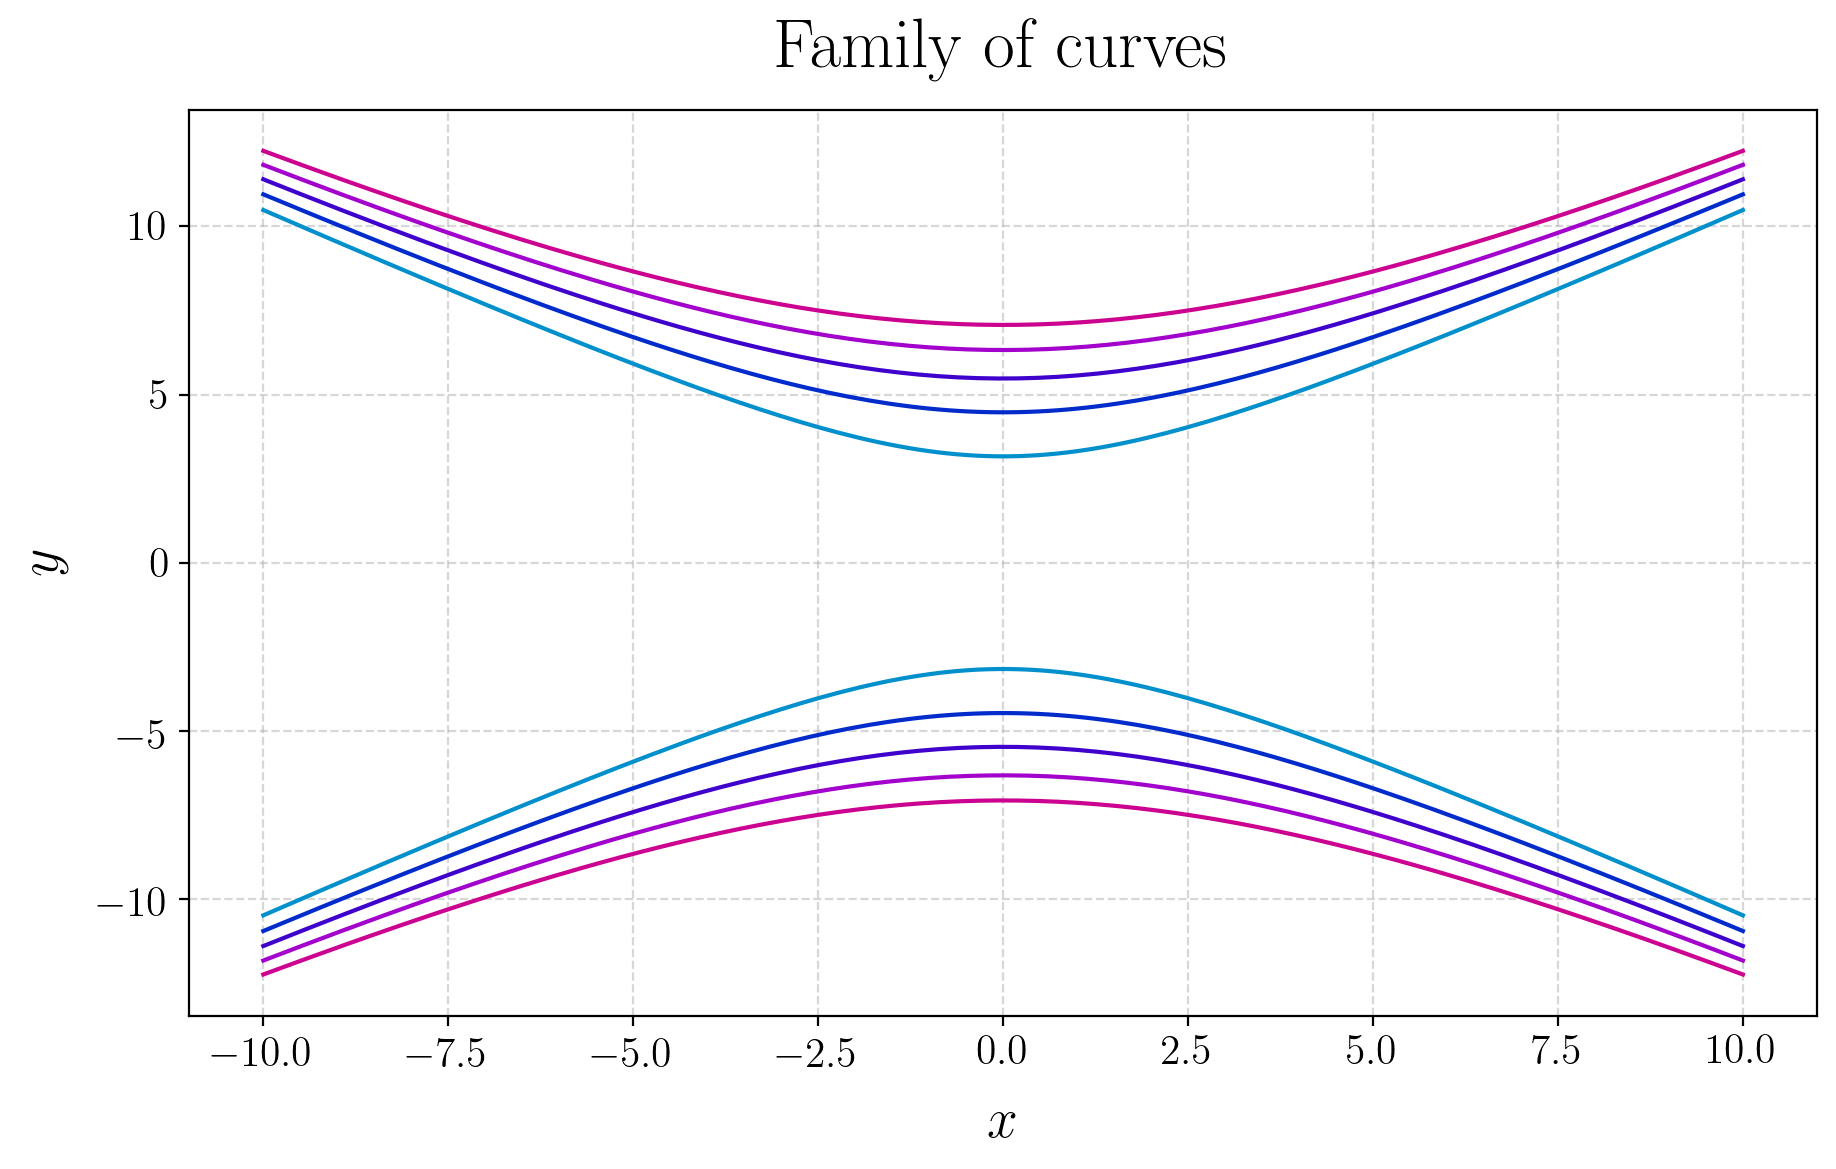

In [4]:
# --------------------------- FAMILY OF CURVES ---------------------
#define our solution
def family(x,c):
    return np.sqrt( c + x**2)

#define the domaing 
X = np.linspace( -10, 10, 150)

#c1 values
c_parameter = [10,20,30,40,50]
colorplot = ['#0290CC','#022BCC', '#3E02CC', '#A302CC', '#CC0290' ]

#create a figure
plt.figure( figsize = (10.5,6),
           dpi = 200,
          )
#use a for loop to plot all the curves
for i in range(len(c_parameter)):
    plt.plot( X, family(X, c_parameter[i]),
             color = colorplot[i],
            )
    plt.plot( X, -1*family(X, c_parameter[i]),
             color = colorplot[i],
            )
    

#Add title and label to the axes
plt.title( r'Family of curves', 
          size = 25, pad = 15 )
plt.xlabel( '$x$', size = 20, labelpad = 10 )
plt.ylabel( '$y$', size = 20, labelpad = 10 )


#increase the size of the ticks
plt.tick_params( labelsize = 15 )

plt.grid( b = True, alpha = 0.5, linestyle = 'dashed' )


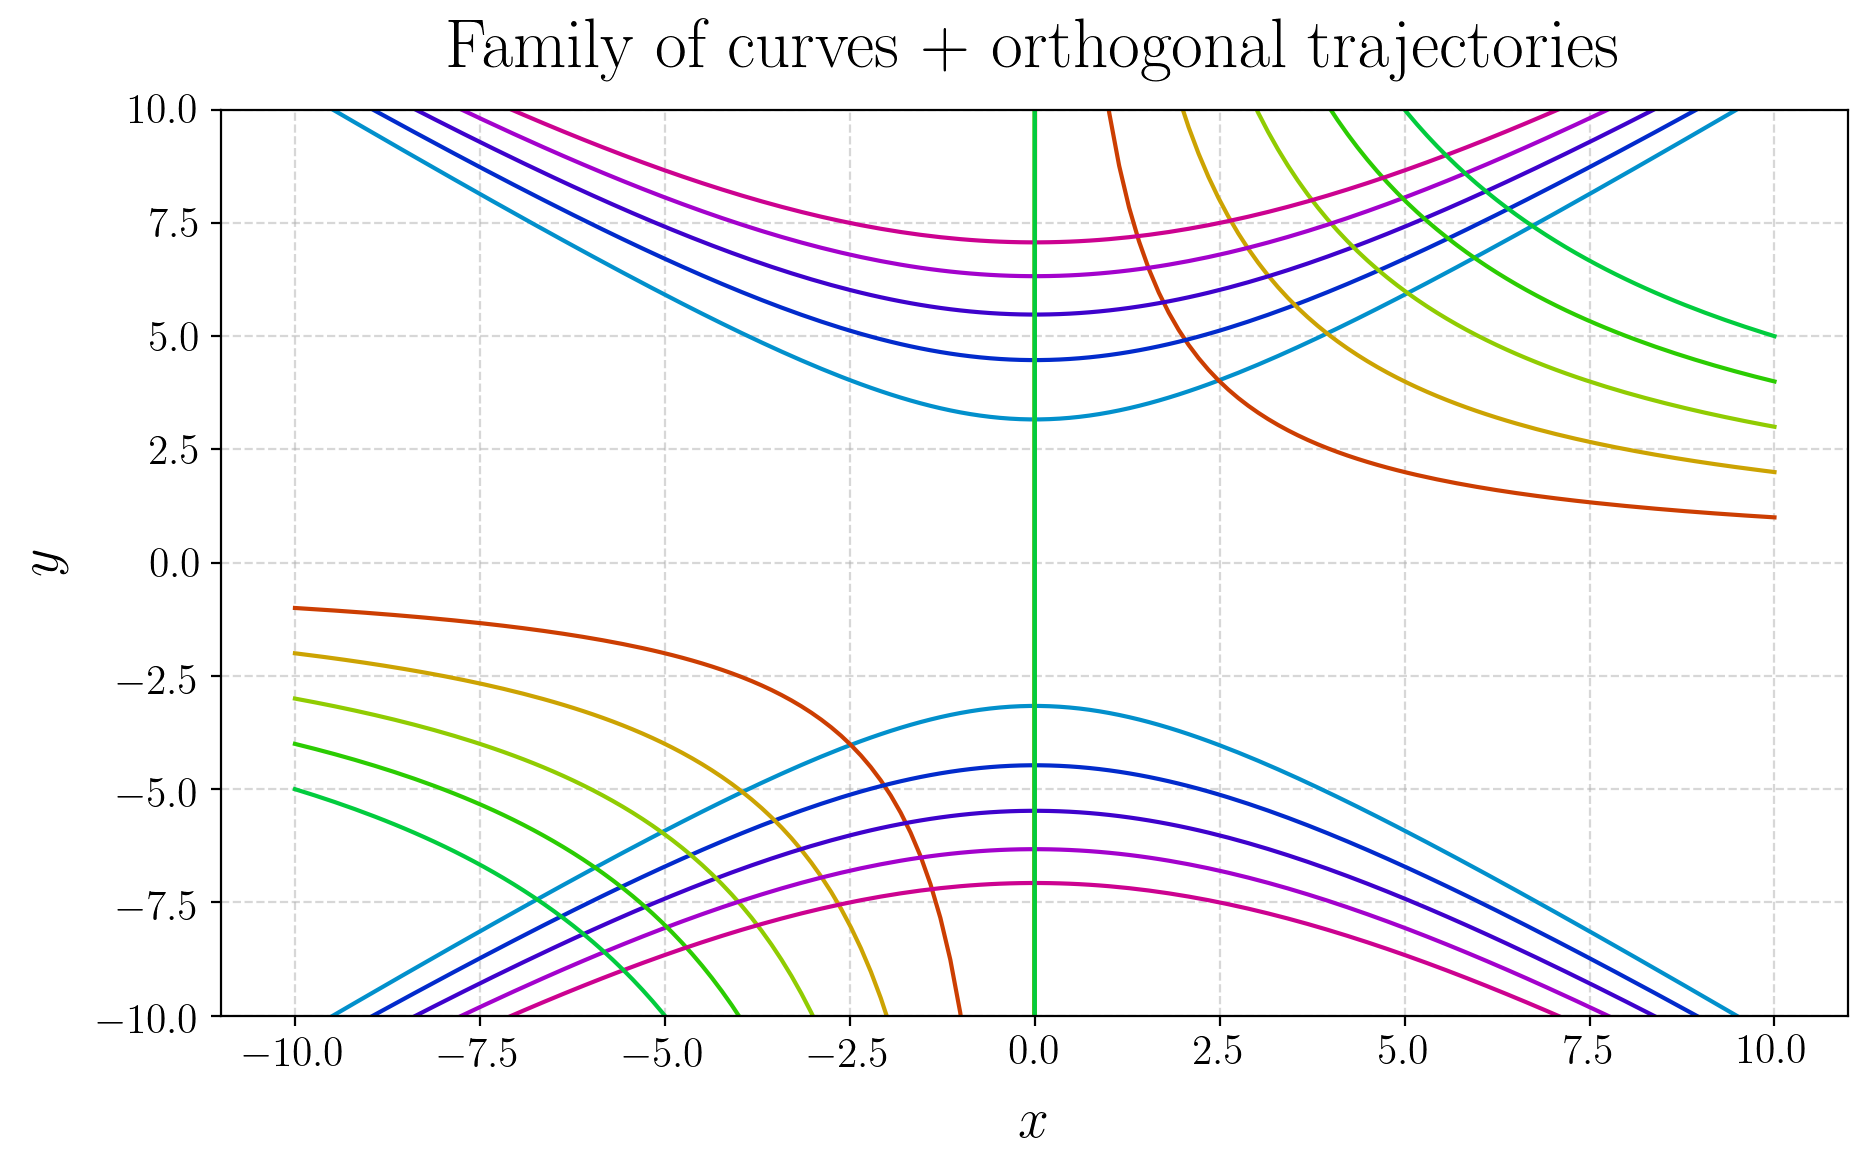

In [5]:
# --------------------------- FAMILY OF CURVES ---------------------
#define function for the family
def family(x,c):
    return np.sqrt( c + x**2)

#define the domaing 
X = np.linspace( -10, 10, 150)

#c values
c_parameter = [10,20,30,40,50]
colorplot = ['#0290CC','#022BCC', '#3E02CC', '#A302CC', '#CC0290' ]

#---------------------- ORTHOGONAL TRAJECTORIES --------------------
#same values for k and c
k_parameter = c_parameter

#define function for the orthogonal trajectories
def orthogonal(x,k):
    return k*(1/x)

orthogonal_colors = ['#CC3E02', '#CCA302', '#90CC02', '#2BCC02', '#02CC3E' ]

#----------------- PLOT TIME ------------------------------------

#create a figure
plt.figure( figsize = (10.5,6),
           dpi = 200,
          )
#use a for loop to plot all the curves
for i in range(len(c_parameter)):
    plt.plot( X, family(X, c_parameter[i]),
             color = colorplot[i],
            )
    plt.plot( X, -1*family(X, c_parameter[i]),
             color = colorplot[i],
            )
    plt.plot( X, orthogonal(X,k_parameter[i]),
             color = orthogonal_colors[i]
            )
    

#Add title and label to the axes
plt.title( r'Family of curves $+$ orthogonal trajectories', 
          size = 25, pad = 15 )
plt.xlabel( '$x$', size = 20, labelpad = 10 )
plt.ylabel( '$y$', size = 20, labelpad = 10 )

#set limits
plt.ylim(-10,10)


#increase the size of the ticks
plt.tick_params( labelsize = 15 )

plt.grid( b = True, alpha = 0.5, linestyle = 'dashed' )

## Logistic Equation

**Logistic Equation (with inmigration)**
$$\frac{dP}{dt} = P\left( 1 - P \right) + 0.3 e^{-P}$$

We're using this function to fin the roots of a function
```Python
from scipy.optimize import fsolve
```
[Documentation of `fsolve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)

### Phase portrait

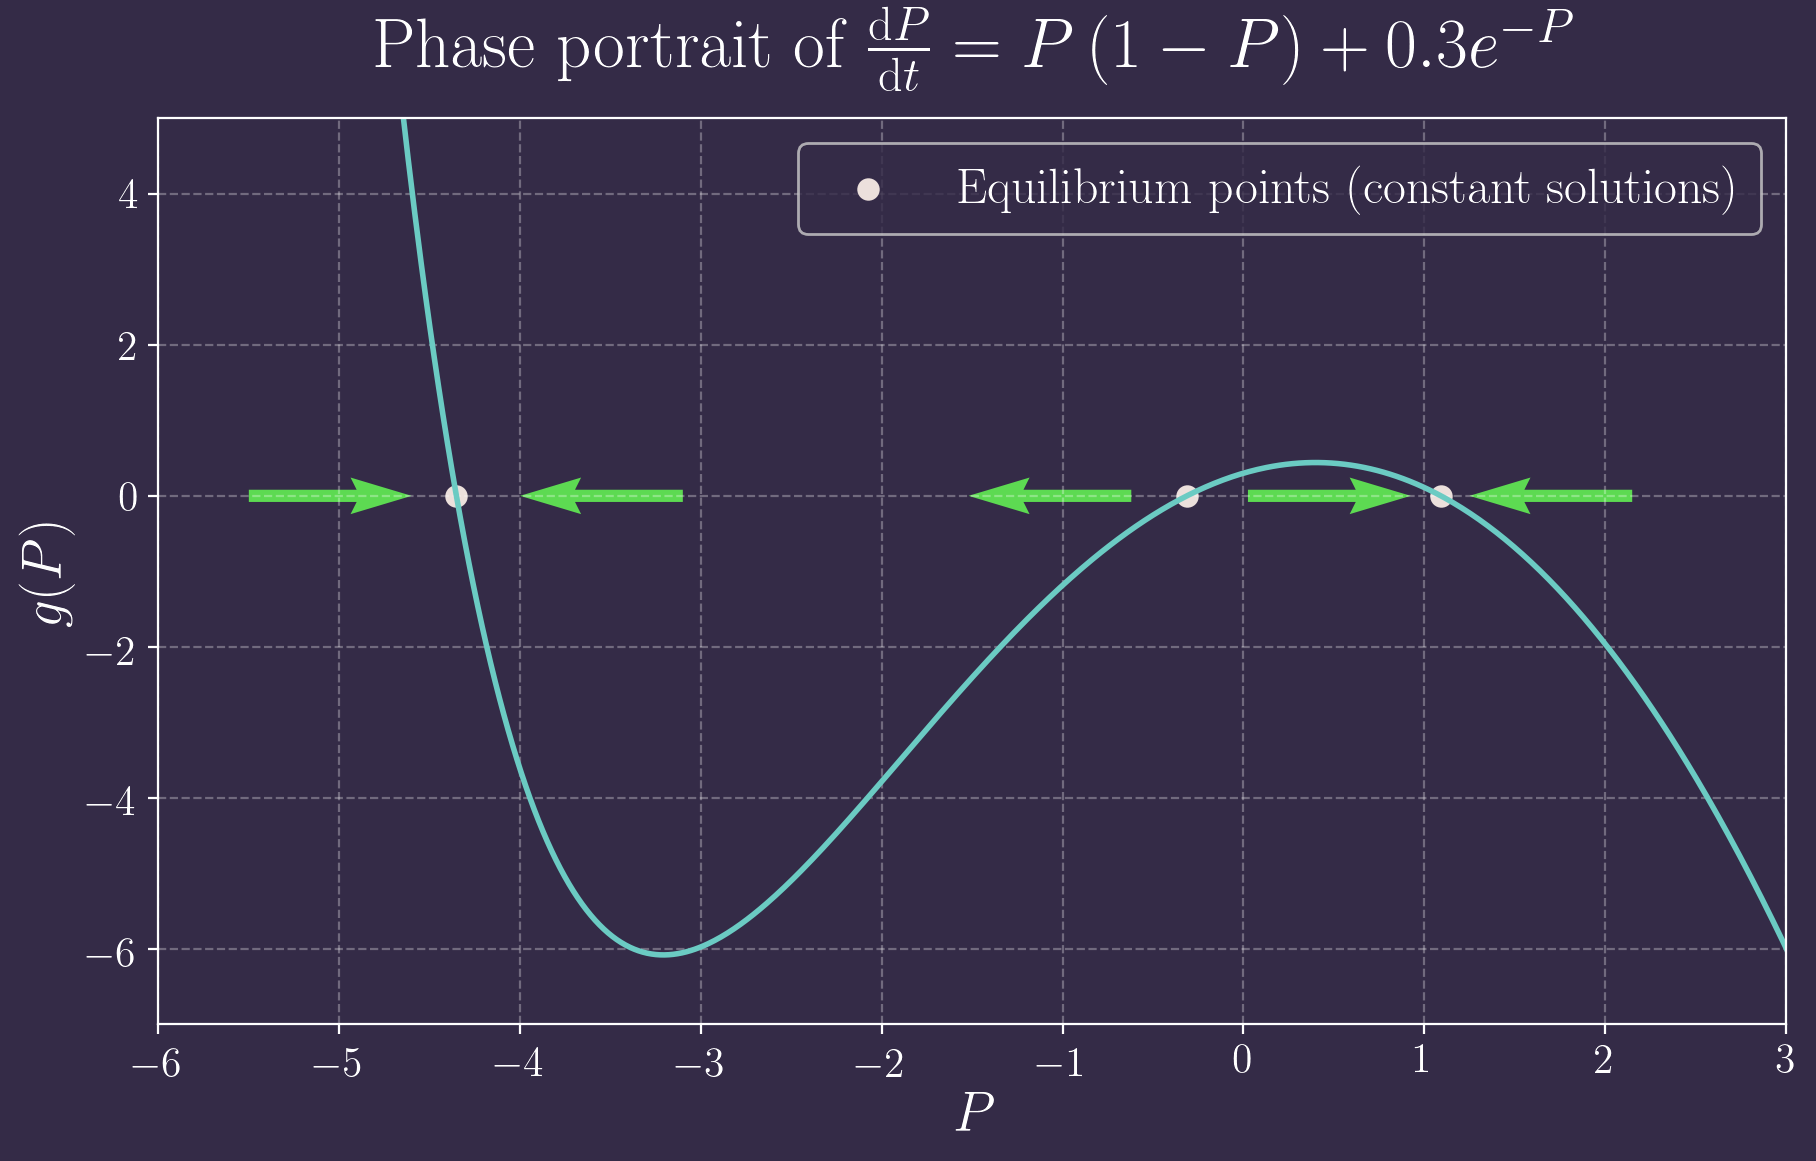

In [6]:
#background color
background = '#342B47'

#import fsolve, to find roots in functions
from scipy.optimize import fsolve

#dP/dt
def f(P,t=0):
    return P*(1-P) + 0.3*np.exp(-P) 

#Domain 
P = np.linspace(-6,6,1000)

#use fsolve to find the roots of the equation
raices_dPdt = fsolve(f, [-5,-1,1])

with plt.style.context('dark_background'):
    #creamos nuestra figura
    plt.figure(figsize=(10.5,6), 
               dpi = 200, 
               facecolor = background
              )
    ax = plt.axes()
    ax.set_facecolor(background)

    #plot g(P)
    plt.plot( P, f(P), 
             color = '#6BCBC3', 
             linewidth = 2,
             #label = 'Gr√°fica 1'
            )
    #plot the equilibrium points
    plt.scatter( raices_dPdt, [ 0 ]*3,
                c = '#ECE0DC',
                label = 'Equilibrium points (constant solutions)',
                s = 50,
                alpha = 1,
               )
    
    #color for the arrows
    color_arrows = '#5DDA52'

    #arrow pointing to P1
    plt.quiver( [-5.5], [0], [2], [0], 
               scale = 20,
               color = color_arrows
              )
    #arrow pointing to P1
    plt.quiver( [-3.1], [0], [-2], [0], 
               scale = 20, 
               color = color_arrows
              )
    #arrow near to P2 but pointing away from it
    plt.quiver( [-0.62], [0], [-2], [0], 
               scale = 20, color = color_arrows
              )
    #arrow near to P2 but pointing away from it but pointing to P3
    plt.quiver( [0.025], [0], [2], [0], 
               scale = 20, color = color_arrows
              )
    #arrow pointing to P3
    plt.quiver( [2.15], [0], [-2], [0], 
               scale = 20, color = color_arrows
              )

    #title and axes labels
    plt.title( r'Phase portrait of $\frac{\mathrm{d}P}{\mathrm{d}t}= P \left( 1 - P \right) + 0.3 e^{-P} $', 
              pad = 10,
              size = 25
             )
    plt.xlabel( r'$P$', size = 20 )
    plt.ylabel( r'$g(P)$', size = 20 )
    plt.tick_params( labelsize = 15 )

    #legend
    plt.legend( loc = 0, prop = {'size':18} ).get_frame().set_facecolor(background)

    #Limit the axes
    plt.ylim(-7,5)
    plt.xlim(-6,3)

    #add grid
    plt.grid(b = True, linestyle  = '--', alpha = 0.3)

### Behaviour

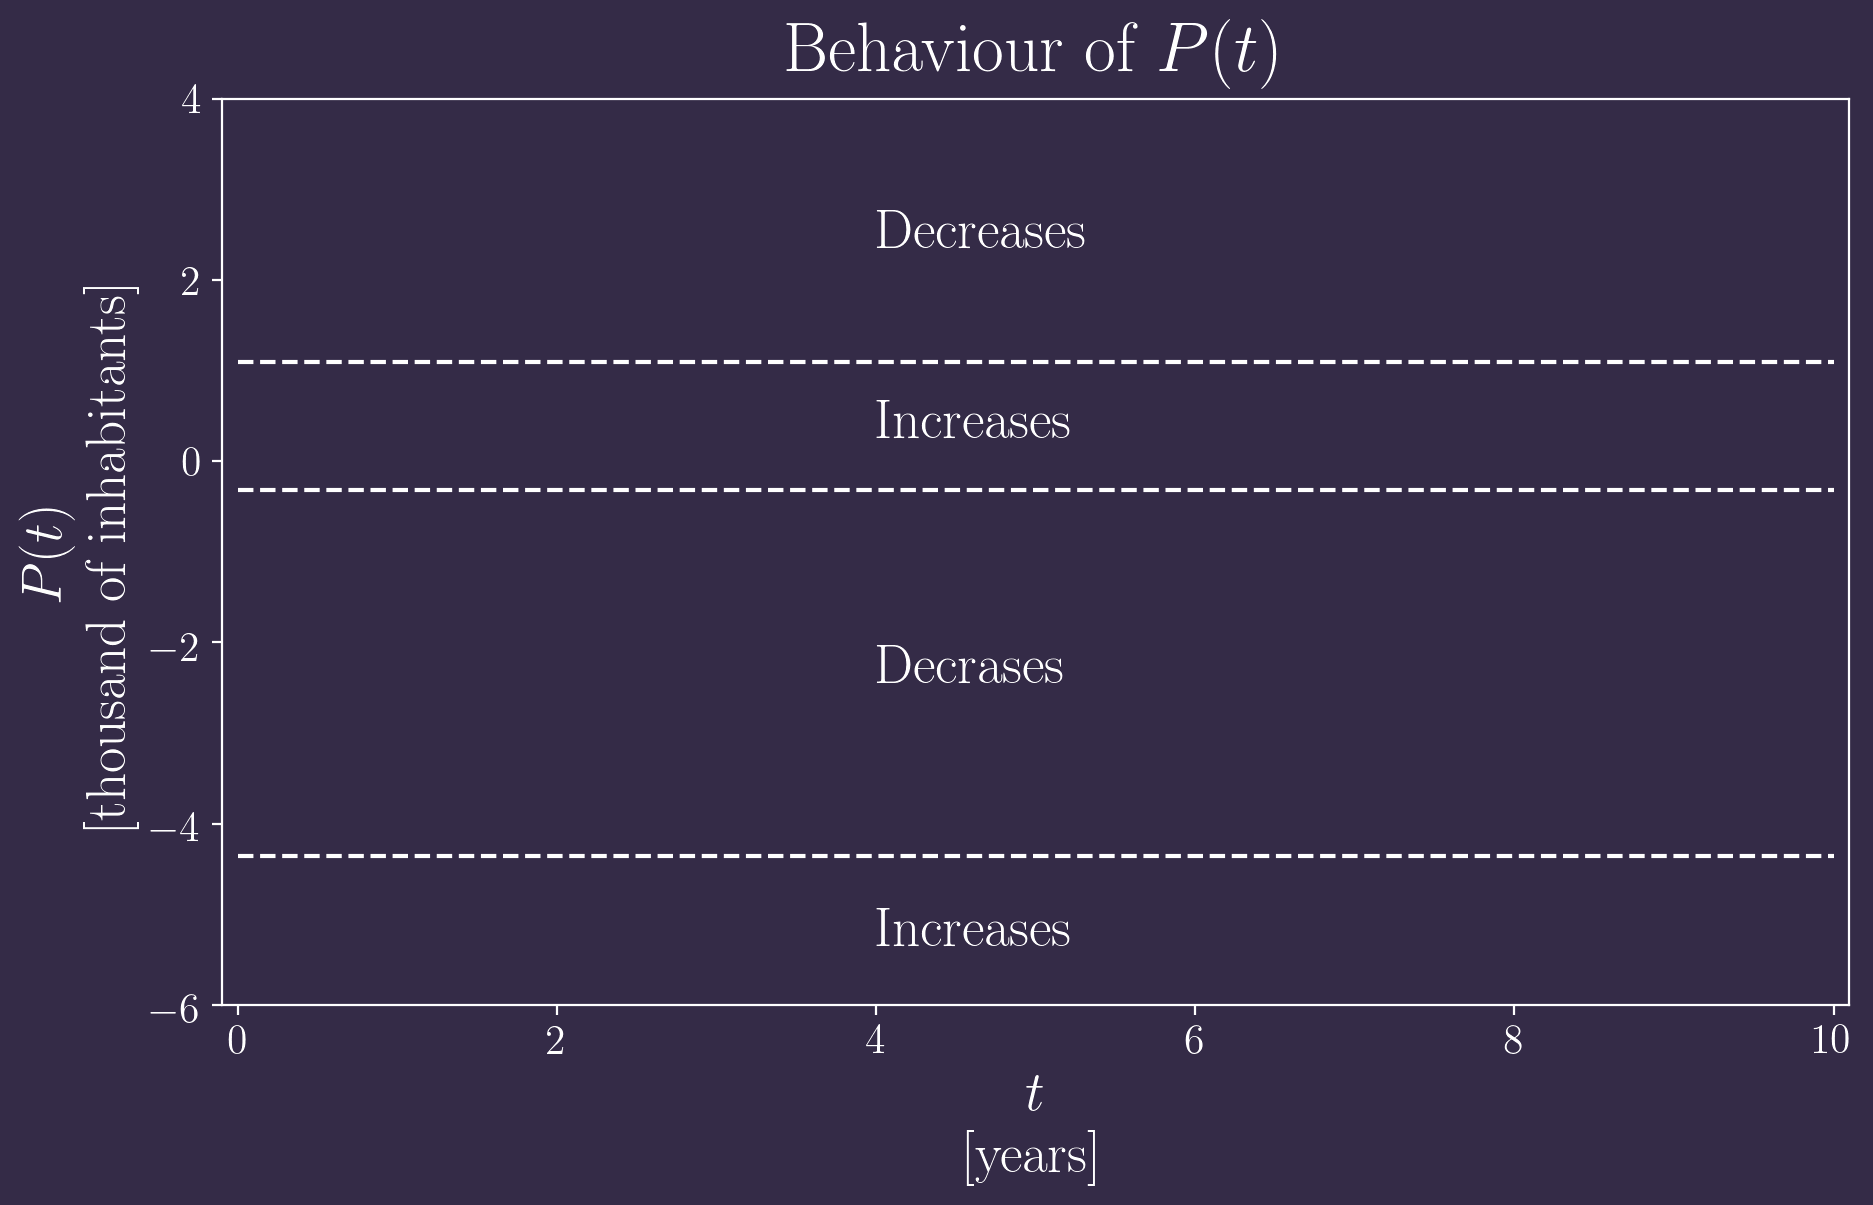

In [7]:
#background color
background = '#342B47'

#import fsolve, to find roots in functions
from scipy.optimize import fsolve

# dP/dt
def f(P,t=0):
    return P*(1-P) + 0.3*np.exp(-P) 

#domain
P = np.linspace(-6,6,1000)

#use fsolve to find the roots of the equation
raices_dPdt = fsolve(f, [-5,-1,1])

with plt.style.context('dark_background'):
    
    #create figure and choose background
    plt.figure(figsize=(10.5,6), 
               dpi = 200, #make your plot an HD-Plot
               facecolor = background
              )
    
    ax = plt.axes()
    ax.set_facecolor(background)

    #add the constant solutions
    for i in range(3):
        plt.plot( [0,10], [ raices_dPdt[i] ]*2, linestyle = '--', color = 'white'  )

    #add text
    plt.text( 4, -5.35, 'Increases', fontsize = 20 )
    plt.text( 4, -2.45, 'Decrases', fontsize = 20 )
    plt.text( 4, 0.25, 'Increases', fontsize = 20 )
    plt.text( 4, 2.35, 'Decreases', fontsize = 20 )


    #title and axes lables 
    plt.title( r'Behaviour of $P(t)$', 
              pad = 10,
              size = 25
             )
    plt.xlabel( '$t$ \n[years]', size = 20 )
    plt.ylabel( '$P(t)$ \n[thousand of inhabitants]', size = 20 )
    plt.tick_params( labelsize = 15 )

    #Limit the axes
    plt.xlim(-0.1, 10.1)
    plt.ylim(-6,4)


### Logistic Function

**Solution**

Using numerical aproximations with `odeint`

```Python
from scipy.integrate import odeint
```

[Documentation of `odeint`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)

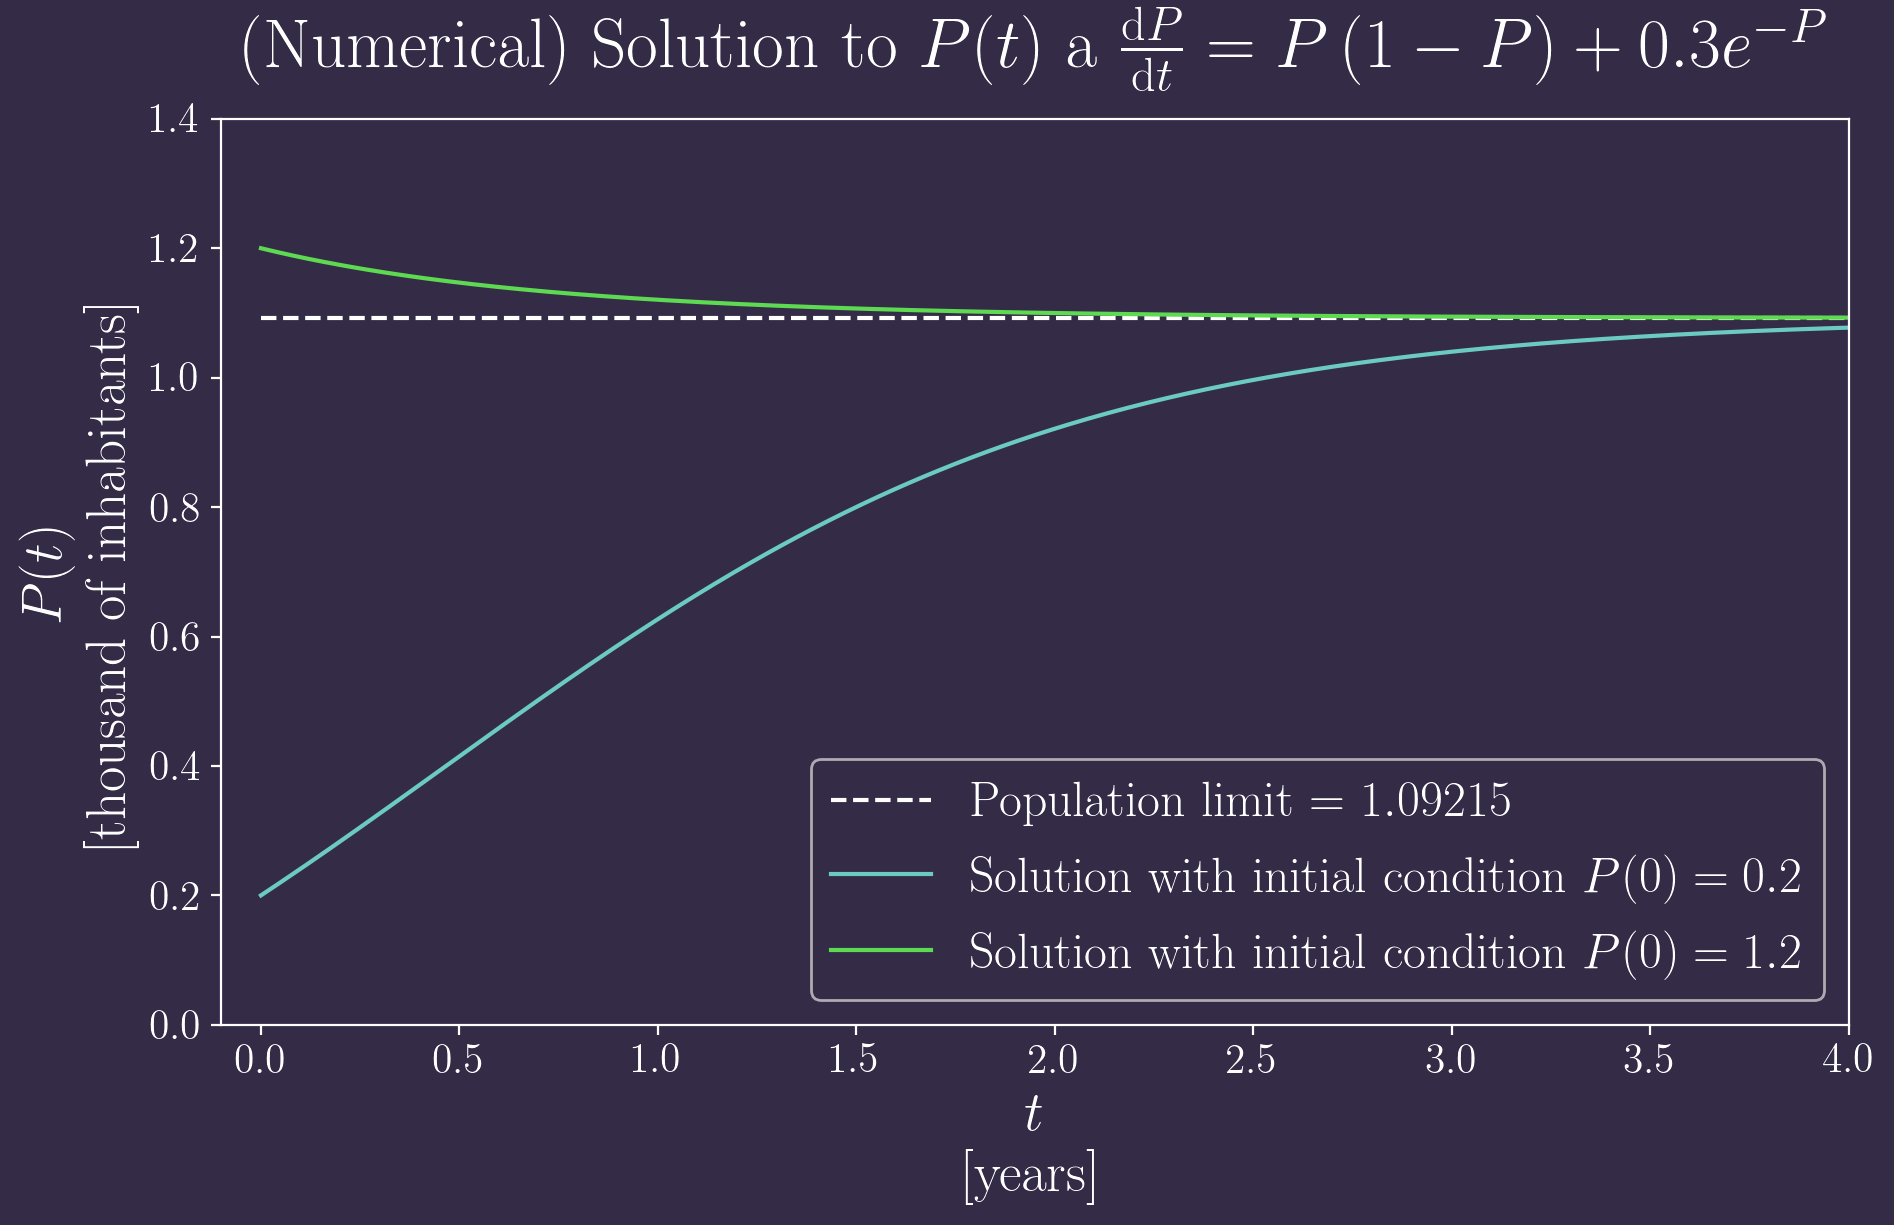

In [8]:
#background color
background = '#342B47'

#import numerical solution to ODE
from scipy.integrate import odeint

#import fsolve, to find roots in functions
from scipy.optimize import fsolve

# dP/dt
def f(P,t=0):
    return P*(1-P) + 0.3*np.exp(-P) 

#use fsolve to find the roots of the equation
raices_dPdt = fsolve(f, [-5,-1,1])

#domain
t = np.linspace(0,10,1000)

#initial conditions [ P(0)=0.2, P(0)=1.2 ]
P0 = [0.2,1.2]

#numerical solutions to the differential equation
y_sol_02 = odeint( f, P0[0] , t )
y_sol_12 = odeint( f, P0[1], t )


with plt.style.context('dark_background'):
    
    #create figure and choose background
    plt.figure(figsize=(10.5,6), 
               dpi = 200, #make your plot an HD-Plot
               facecolor = background
              )
    
    ax = plt.axes()
    ax.set_facecolor(background)

    #plot the equilibrium line (constant solution)
    plt.plot( [0,10], [ raices_dPdt[2] ]*2, linestyle = '--', color = 'white', 
             label = 'Population limit = $1.09215$' )
    
    #plot the first solution P'(0)=0.2
    plt.plot( t, y_sol_02, 
             linestyle = '-', 
             label = 'Solution with initial condition $P(0)=0.2$',
             color = '#6BCBC3'
            )
    #plot the second solution P'(0)=1.2
    plt.plot( t, y_sol_12, 
             linestyle = '-', 
             label = 'Solution with initial condition $P(0)=1.2$',
             color = '#5DDA52'
            )

    #title and axes labels
    plt.title( r'(Numerical) Solution to $P(t)$ a $\frac{\mathrm{d}P }{\mathrm{d}t } = P \left( 1 - P \right) + 0.3 e^{-P}$', 
              pad = 10,
              size = 25
             )
    plt.xlabel( '$t$ \n[years]', size = 20 )
    plt.ylabel( '$P(t)$ \n[thousand of inhabitants]', size = 20 )
    plt.tick_params( labelsize = 15 )
    plt.xlim(-0.1,4)
    plt.ylim(0,1.4)

    #ad legend
    plt.legend( loc = 0, prop = {'size':18} ).get_frame().set_facecolor(background)